# Proyecto final 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sys
sys.path.append("../proyecto_final_chavez_aguilar_rd/")
from proyecto_final_chavez_aguilar_rd import *
pd.set_option("display.max_columns",200)
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples

from sklearn.preprocessing import MinMaxScaler,StandardScaler
#from sklearn.manifold import TSNE #instrumentalness
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.manifold import MDS,TSNE

from scipy.stats import kruskal
from statsmodels.stats.multicomp import MultiComparison

from itertools import chain
from functools import reduce


import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Datos obtenidos de https://www.kaggle.com/sakshigoyal7/credit-card-customers/version/1?select=BankChurners.csv

### Introducción

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

### Variables
* CLIENTNUM: *Client number. Unique identifier for the customer holding the account*
* Attrition_Flag: *Internal event (customer activity) variable - if the account is closed then 1 else 0*
* Customer_Age: *Demographic variable - Customer's Age in Years*
* Gender: *Demographic variable - M=Male, F=Female*
* Dependent_count: *Demographic variable - Number of dependents*
* Education_Level: *Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)*
* Marital_Status: *Demographic variable - Married, Single, Divorced, Unknown*
* Income_Category: *Demographic variable - Annual Income Category of the account holder (<40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)*
* Card_Category: *Product Variable - Type of Card (Blue, Silver, Gold, Platinum)*
* Months_on_booksort: *Period of relationship with bank*
* Total_Relationship_Count: *Total no. of products held by the customer*
* Months_Inactive_12_mon: *No. of months inactive in the last 12 months*
* Contacts_Count_12_mon: *No. of Contacts in the last 12 months*
* Credit_Limit: *Credit Limit on the Credit Card*
* Total_Revolving_Bal: *Total Revolving Balance on the Credit Card*
* Avg_Open_To_Buy: *Open to Buy Credit Line (Average of last 12 months)*
* Total_Amt_Chng_Q4_Q1: *Change in Transaction Amount (Q4 over Q1)*
* Total_Trans_Amt: *Total Transaction Amount (Last 12 months)*
* Total_Trans_Ct: *Total Transaction Count (Last 12 months)*
* Total_Ct_Chng_Q4_Q1: *Change in Transaction Count (Q4 over Q1)*
* Avg_Utilization_Ratio: *Average Card Utilization Ratio*
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: *Naive Bayes*
* Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: *Naive Bayes*

**Comenzamos trabajando con el archivo "datos_proyectoM3.csv", en el que ya se depuraron las variables y se hicieron algunos cambios como mover los outliers a 1.5 veces su rango intercuartil**

In [2]:
#set.seed(1234)

In [3]:

df=pd.read_csv("datos_proyectoM3.csv")

In [4]:
df.head()

,Unnamed: 0,id_clientum,tgt,c_customer_age,v_gender,c_dependent_count,v_education_level,v_marital_status,v_income_category,v_card_category,c_months_on_book,c_total_relationship_count,c_months_inactive_12_mon,c_contacts_count_12_mon,c_credit_limit,c_total_revolving_bal,c_avg_open_to_buy,c_total_amt_chng_q4_q1,c_total_trans_amt,c_total_trans_ct,c_total_ct_chng_q4_q1,c_avg_utilization_ratio
0,0,708790833,0,42,m,5,uneducated,unknown,120k +,blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201.0,42,0.680,0.217
1,1,712396908,0,57,f,2,graduate,married,less than 40k,blue,48,5,2,2,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
2,2,709327383,0,45,f,2,graduate,married,unknown,blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207.0,21,0.909,0.080
3,3,708508758,1,62,f,0,graduate,married,less than 40k,blue,49,2,3,3,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
4,4,811604133,0,47,f,4,unknown,single,less than 40k,blue,36,3,3,2,2492.0,1560,932.0,0.573,1126.0,23,0.353,0.626


In [5]:
df=df.drop(columns=["Unnamed: 0"])

In [6]:
df.head()

,id_clientum,tgt,c_customer_age,v_gender,c_dependent_count,v_education_level,v_marital_status,v_income_category,v_card_category,c_months_on_book,c_total_relationship_count,c_months_inactive_12_mon,c_contacts_count_12_mon,c_credit_limit,c_total_revolving_bal,c_avg_open_to_buy,c_total_amt_chng_q4_q1,c_total_trans_amt,c_total_trans_ct,c_total_ct_chng_q4_q1,c_avg_utilization_ratio
0,708790833,0,42,m,5,uneducated,unknown,120k +,blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201.0,42,0.680,0.217
1,712396908,0,57,f,2,graduate,married,less than 40k,blue,48,5,2,2,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
2,709327383,0,45,f,2,graduate,married,unknown,blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207.0,21,0.909,0.080
3,708508758,1,62,f,0,graduate,married,less than 40k,blue,49,2,3,3,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
4,811604133,0,47,f,4,unknown,single,less than 40k,blue,36,3,3,2,2492.0,1560,932.0,0.573,1126.0,23,0.353,0.626


In [7]:
df.describe()

,id_clientum,tgt,c_customer_age,c_dependent_count,c_months_on_book,c_total_relationship_count,c_months_inactive_12_mon,c_contacts_count_12_mon,c_credit_limit,c_total_revolving_bal,c_avg_open_to_buy,c_total_amt_chng_q4_q1,c_total_trans_amt,c_total_trans_ct,c_total_ct_chng_q4_q1,c_avg_utilization_ratio
count,8.417000e+03,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000,8417.000000
mean,7.382207e+08,0.166924,46.353451,2.419865,35.920637,3.767376,2.265415,2.510633,8770.291565,1152.952952,6820.756457,0.735476,4114.398865,66.900796,0.691752,0.269952
std,3.624421e+07,0.372930,7.332537,1.269627,6.955837,1.573324,0.857827,0.946985,9249.941070,815.840958,7295.637673,0.161878,2172.357940,23.019530,0.174098,0.273428
min,7.080821e+08,0.000000,27.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1438.300000,0.000000,24.000000,0.293000,594.000000,12.000000,0.231000,0.000000
25%,7.129905e+08,0.000000,41.000000,2.000000,32.000000,3.000000,2.000000,2.000000,2542.000000,216.000000,1365.000000,0.628000,2312.000000,48.000000,0.582000,0.016000
50%,7.177835e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000,4597.000000,1264.000000,3515.000000,0.729000,4051.000000,69.000000,0.694000,0.171000
75%,7.722312e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11250.000000,1777.000000,10035.000000,0.842000,4812.000000,82.000000,0.804000,0.494000
max,8.283431e+08,1.000000,68.000000,5.000000,53.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,22660.750000,1.201000,8619.250000,134.000000,1.171000,0.988000


In [8]:
df.shape

(8417, 21)

In [9]:
pd.concat([df.min().rename('min'), df.max().rename('max')], axis=1)

,min,max
id_clientum,708082083,828343083
tgt,0,1
c_customer_age,27,68
v_gender,f,m
c_dependent_count,0,5
v_education_level,college,unknown
v_marital_status,divorced,unknown
v_income_category,120k +,unknown
v_card_category,blue,silver
c_months_on_book,18,53


* Las variables no están estandarizadas, para tenerlo en consideración en las técnicas a aplicar

In [10]:
df.columns.to_list()

['id_clientum',
 'tgt',
 'c_customer_age',
 'v_gender',
 'c_dependent_count',
 'v_education_level',
 'v_marital_status',
 'v_income_category',
 'v_card_category',
 'c_months_on_book',
 'c_total_relationship_count',
 'c_months_inactive_12_mon',
 'c_contacts_count_12_mon',
 'c_credit_limit',
 'c_total_revolving_bal',
 'c_avg_open_to_buy',
 'c_total_amt_chng_q4_q1',
 'c_total_trans_amt',
 'c_total_trans_ct',
 'c_total_ct_chng_q4_q1',
 'c_avg_utilization_ratio']

## Análisis descriptivo

In [11]:
for col in df.filter(like="v_"):
    bar(df,col,col).show()

In [12]:
df=df.rename(columns={'c_customer_age':"edad_cliente",'c_dependent_count':"dependientes",
                      'c_months_on_book':"meses_activo",'c_total_relationship_count':"total_cuentas",
                      'c_months_inactive_12_mon':"meses_inactivo",'c_contacts_count_12_mon':"acercamientos_12m",
                      'c_credit_limit':"limite_credito",'c_total_revolving_bal':"credito_revolvente",'c_avg_open_to_buy':"saldo_disponible",
                      'c_total_amt_chng_q4_q1':"cambios_importe_q4vsq1",'c_total_trans_amt':"importe_total",'c_total_trans_ct':"total_trans",'c_total_ct_chng_q4_q1':"cambios_q4vsq1",
                      'c_avg_utilization_ratio':"radio_uso_prom"})

In [13]:
df.head()

,id_clientum,tgt,edad_cliente,v_gender,dependientes,v_education_level,v_marital_status,v_income_category,v_card_category,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom
0,708790833,0,42,m,5,uneducated,unknown,120k +,blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201.0,42,0.680,0.217
1,712396908,0,57,f,2,graduate,married,less than 40k,blue,48,5,2,2,2436.0,680,1756.0,1.190,1570.0,29,0.611,0.279
2,709327383,0,45,f,2,graduate,married,unknown,blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207.0,21,0.909,0.080
3,708508758,1,62,f,0,graduate,married,less than 40k,blue,49,2,3,3,1438.3,0,1438.3,1.047,692.0,16,0.600,0.000
4,811604133,0,47,f,4,unknown,single,less than 40k,blue,36,3,3,2,2492.0,1560,932.0,0.573,1126.0,23,0.353,0.626


In [14]:
numericas=["edad_cliente","dependientes","meses_activo","total_cuentas",
           "meses_inactivo","acercamientos_12m","limite_credito","credito_revolvente",
           "saldo_disponible","cambios_importe_q4vsq1","importe_total","total_trans",
           "cambios_q4vsq1","radio_uso_prom"]
aux=df[numericas]

In [15]:
for col in df.filter(like="c_"):
    fig=histogram(df,col,5,col)
    fig.show()

In [16]:
#data es ahora la matriz de variables
data_values = aux.values
min_max_scaler = preprocessing.MinMaxScaler()
data_values = min_max_scaler.fit_transform(data_values)
Xs = pd.DataFrame(data_values, columns=aux.columns)

In [17]:
for n_compo in range(1,8):
    print(f"N componentes : {n_compo}")
    pca = PCA(n_components=n_compo)
    pca.fit(Xs)
    print(sum(pca.explained_variance_ratio_))
    print("\n")

N componentes : 1
0.2312291410243725


N componentes : 2
0.3929997351631566


N componentes : 3
0.5205167013523078


N componentes : 4
0.6151012387844415


N componentes : 5
0.7017373282849974


N componentes : 6
0.7757065211348422


N componentes : 7
0.8474294098261907




In [18]:
#Para visualización creamos dos o tres componentes para tener una idea de como se ve nuestra información continua
#Tomando en cuenta la varianza explicada (algunas veces no es tan representativo)
pca = PCA(n_components=2)
dimention_2=pca.fit_transform(Xs)
Xp = pd.DataFrame(pca.fit_transform(Xs))
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter(dimention_2, x=0, y=1,title=f'Total de Varianza Explicada: {total_var:.2f}%',
                 labels={'0': 'Componente Principal 1', '1': 'Componente Principal 2'})
fig.show()

## MDS

In [19]:
mds = MDS(n_components=2,n_jobs=-1)

In [20]:
X_sample=Xs.sample(frac=.25) ##Dado el volumen de los datos, solo lo realizamos con una muestra

In [21]:
Xm  = pd.DataFrame(mds.fit_transform(X_sample),columns=['d1','d2'])

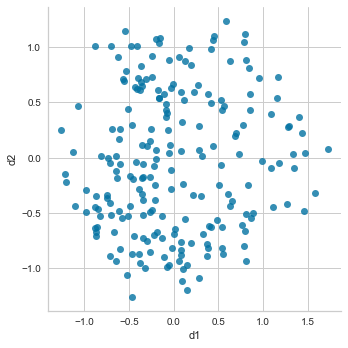

In [22]:
sns.lmplot(data=Xm.sample(frac=0.1),x='d1',y='d2',fit_reg=False)

## TSNE

In [23]:
tsne = TSNE(n_components=2, perplexity=20)

In [24]:
Xt  = pd.DataFrame(tsne.fit_transform(Xs),columns=['t1','t2'])

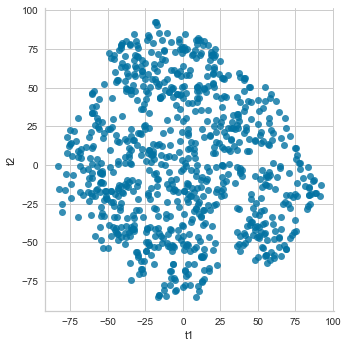

In [25]:
sns.lmplot(data=Xt.sample(frac=0.1),x='t1',y='t2',fit_reg=False)

In [26]:
Xt

,t1,t2
0,-17.083361,-4.115355
1,-0.744160,-12.197338
2,34.308327,9.944221
3,-49.023430,72.624573
4,-84.287575,-3.158296
...,...,...
8412,37.538952,-47.818398
8413,35.838600,-42.600197
8414,53.207787,-1.868687
8415,55.075089,-2.877446


In [27]:
tsne.kl_divergence_

2.273411273956299

La divergencia Kullback-Leibier (KL) proporciona una medida de la similitud de dos distribuciones de probabilidad discretas conocidas, P y Q, donde P representa la distribución de datos real y Q representa la distribución de datos predicha. La divergencia KL también se llama entropía relativa de P con respecto a Q y cuantifica la información perdida al pasar de P a Q. No es una verdadera métrica de la distancia entre P y Q, pero es una medida de divergencia.
Los valores cercanos a cero significan que los resultados se distribuyen de manera similar para las diferentes facetas. Los valores positivos significan que las distribuciones de las etiquetas divergen: cuanto más positivo es, mayor es la divergencia.

**No está tan clara la separación de clusters con éstos métodos gráficos**

# Clusters

### Aglomerativo

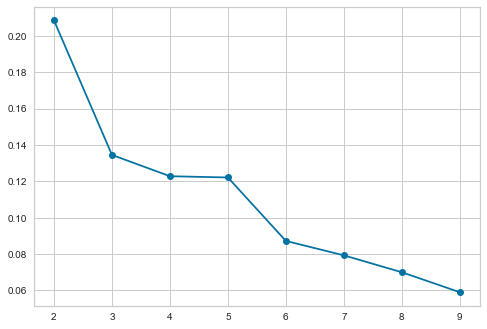

In [28]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              AgglomerativeClustering(n_clusters=k).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [29]:
k = 3
tipo = 'agg'
agg = AgglomerativeClustering(n_clusters=k)
df[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =agg.fit_predict(Xs)

## K-means

### Inercia

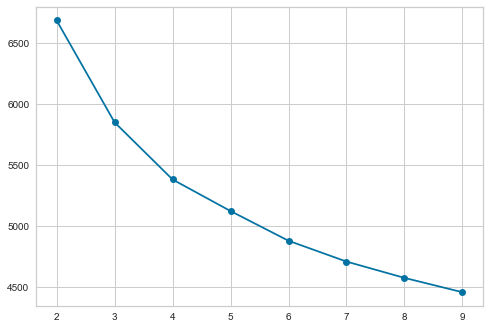

In [30]:
lst_inertia = []
n = 20
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_inertia.append(cl.inertia_)
plt.plot(range(2,10),lst_inertia,marker='o')

In [31]:
## Se podría pensar que se pueden formar entre 4 y 7 clusters

In [32]:
k = 4
tipo = 'kme'

kme = KMeans(n_clusters=k,max_iter=1000)
df[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =kme.fit_predict(Xs)

### Modelos Gaussianos Mixtos

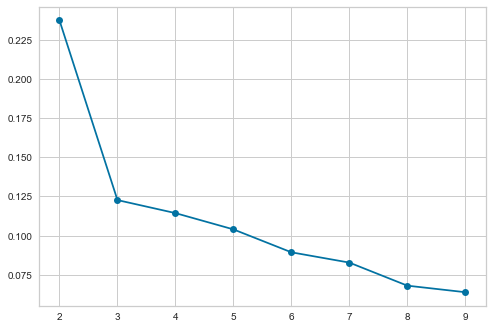

In [33]:
sil = pd.DataFrame(map(lambda k:(k,silhouette_score(Xs,
                                              GaussianMixture(n_components=k,max_iter=1000).fit_predict(Xs))),
                 range(2,10)),columns=['k','sil'])
plt.plot(sil['k'],sil['sil'],marker='o')

In [34]:
k = 3
tipo = 'gmm'
gmm = GaussianMixture(n_components=k,max_iter=1000)
df[f'cl_{tipo}']=Xp[f'cl_{tipo}']=Xt[f'cl_{tipo}'] =gmm.fit_predict(Xs)

## Selección final

In [35]:
varcl = sorted(df.filter(like='cl_'))
for v in varcl:
    Xp[v] = Xp[v].astype(str)
    #Xm[v] = Xm[v].astype(str)
    Xt[v] = Xt[v].astype(str)
    df[v] = df[v].astype(str)
    
pd.DataFrame(map(lambda cl:(cl,silhouette_score(Xs,df[cl])),varcl),columns=['cluster','sil']).iplot(kind='bar',categories='cluster')

**El que proporciona la silueta más grande fue K-Means**

### Visualización con cluster

<AxesSubplot:xlabel='0', ylabel='1'>

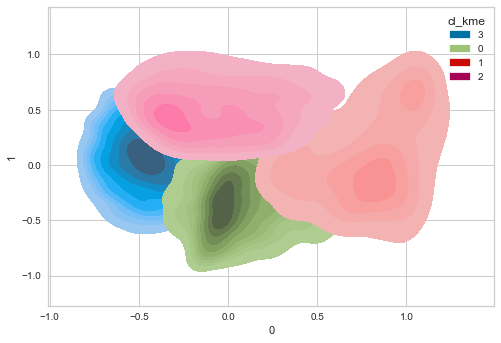

In [36]:
Xp.iplot(kind='scatter2d',x=0,y=1,mode='markers',categories='cl_kme')
sns.kdeplot(data=Xp,x=0,y=1,fill=True,hue='cl_kme')

In [37]:
Xp.shape,Xt.shape,Xs.shape, df.shape

((8417, 5), (8417, 5), (8417, 14), (8417, 24))

In [38]:
numericas

['edad_cliente',
 'dependientes',
 'meses_activo',
 'total_cuentas',
 'meses_inactivo',
 'acercamientos_12m',
 'limite_credito',
 'credito_revolvente',
 'saldo_disponible',
 'cambios_importe_q4vsq1',
 'importe_total',
 'total_trans',
 'cambios_q4vsq1',
 'radio_uso_prom']

## Perfilamiento

In [39]:
v = numericas[0]
pd.DataFrame(map(lambda v:(v,
              kruskal(*[d[v].reset_index(drop=True) for cl,d in df[['cl_kme',v]].groupby('cl_kme')]).pvalue),numericas),
             columns=['variable','p-value']).round(2)

,variable,p-value
0,edad_cliente,0.33
1,dependientes,0.00
2,meses_activo,0.75
3,total_cuentas,0.00
4,meses_inactivo,0.00
5,acercamientos_12m,0.00
6,limite_credito,0.00
7,credito_revolvente,0.00
8,saldo_disponible,0.00
9,cambios_importe_q4vsq1,0.00


Para que haya un cambio en las variabeles, el p-value debe ser de 0.05, lo cual no se cumple en "c_customer_age" y "c_months_on_book"

In [40]:
df['cl_kme'].value_counts(1)

3    0.369847
0    0.281335
1    0.178924
2    0.169894
Name: cl_kme, dtype: float64

In [41]:
my_pie_count(df,"cl_kme",title="Proporción por grupo")

edad_cliente


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.079,0.9,-0.5419,0.7,False
0,2,-0.1411,0.9,-0.772,0.4899,False
0,3,0.2983,0.4438,-0.2154,0.812,False
1,2,-0.2201,0.8288,-0.9157,0.4755,False
1,3,0.2192,0.7505,-0.3721,0.8106,False
2,3,0.4393,0.2386,-0.1625,1.0412,False


dependientes


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.2182,0.001,0.111,0.3254,True
0,2,0.1334,0.009,0.0245,0.2424,True
0,3,-0.0341,0.7303,-0.1228,0.0546,False
1,2,-0.0848,0.267,-0.2049,0.0353,False
1,3,-0.2523,0.001,-0.3544,-0.1502,True
2,3,-0.1675,0.001,-0.2715,-0.0636,True


meses_activo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0647,0.9,-0.5244,0.6539,False
0,2,-0.0973,0.9,-0.6959,0.5013,False
0,3,0.1767,0.7622,-0.3107,0.6641,False
1,2,-0.162,0.9,-0.822,0.498,False
1,3,0.112,0.9,-0.4491,0.673,False
2,3,0.274,0.5931,-0.297,0.845,False


total_cuentas


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.2771,0.001,-0.389,-0.1652,True
0,2,-1.9551,0.001,-2.0688,-1.8414,True
0,3,0.5265,0.001,0.4339,0.6191,True
1,2,-1.678,0.001,-1.8033,-1.5527,True
1,3,0.8036,0.001,0.697,0.9101,True
2,3,2.4816,0.001,2.3731,2.59,True


meses_inactivo


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.1731,0.001,-0.2452,-0.1009,True
0,2,-0.3109,0.001,-0.3842,-0.2376,True
0,3,-0.1611,0.001,-0.2208,-0.1014,True
1,2,-0.1378,0.001,-0.2186,-0.057,True
1,3,0.0119,0.9,-0.0567,0.0806,False
2,3,0.1498,0.001,0.0799,0.2197,True


acercamientos_12m


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,-0.1301,0.001,-0.2076,-0.0526,True
0,2,-0.6995,0.001,-0.7782,-0.6207,True
0,3,-0.0734,0.0173,-0.1375,-0.0093,True
1,2,-0.5694,0.001,-0.6562,-0.4826,True
1,3,0.0567,0.1982,-0.0171,0.1305,False
2,3,0.6261,0.001,0.5509,0.7012,True


limite_credito


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,20630.4393,0.001,20256.3463,21004.5324,True
0,2,742.2723,0.001,362.1514,1122.3933,True
0,3,-1389.9107,0.001,-1699.405,-1080.4164,True
1,2,-19888.167,0.001,-20307.2506,-19469.0834,True
1,3,-22020.35,0.001,-22376.6166,-21664.0834,True
2,3,-2132.183,0.001,-2494.774,-1769.5921,True


credito_revolvente


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,954.0739,0.001,906.1308,1002.0169,True
0,2,1173.8842,0.001,1125.1687,1222.5998,True
0,3,1430.4079,0.001,1390.7437,1470.0721,True
1,2,219.8103,0.001,166.1014,273.5193,True
1,3,476.334,0.001,430.6756,521.9925,True
2,3,256.5237,0.001,210.0548,302.9926,True


saldo_disponible


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,15224.2858,0.001,14938.7734,15509.7981,True
0,2,-431.6119,0.001,-721.7248,-141.4989,True
0,3,-2820.3186,0.001,-3056.5284,-2584.1088,True
1,2,-15655.8976,0.001,-15975.7474,-15336.0479,True
1,3,-18044.6044,0.001,-18316.5114,-17772.6973,True
2,3,-2388.7067,0.001,-2665.4406,-2111.9729,True


cambios_importe_q4vsq1


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0184,0.0031,0.0047,0.0321,True
0,2,0.0311,0.001,0.0172,0.045,True
0,3,0.0185,0.001,0.0071,0.0298,True
1,2,0.0127,0.1425,-0.0026,0.0281,False
1,3,0.0001,0.9,-0.013,0.0131,False
2,3,-0.0127,0.0673,-0.0259,0.0006,False


importe_total


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,1286.1092,0.001,1135.2005,1437.0179,True
0,2,3346.3621,0.001,3193.0218,3499.7025,True
0,3,26.8685,0.9,-97.9811,151.7181,False
1,2,2060.253,0.001,1891.1951,2229.3108,True
1,3,-1259.2407,0.001,-1402.9582,-1115.5231,True
2,3,-3319.4937,0.001,-3465.7624,-3173.2249,True


total_trans


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,11.0209,0.001,9.3217,12.7201,True
0,2,31.7875,0.001,30.0609,33.5142,True
0,3,2.3649,0.001,0.9591,3.7707,True
1,2,20.7666,0.001,18.863,22.6702,True
1,3,-8.656,0.001,-10.2743,-7.0377,True
2,3,-29.4226,0.001,-31.0696,-27.7756,True


cambios_q4vsq1


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0397,0.001,0.0251,0.0542,True
0,2,0.09,0.001,0.0753,0.1048,True
0,3,0.0516,0.001,0.0396,0.0636,True
1,2,0.0504,0.001,0.0341,0.0666,True
1,3,0.0119,0.1187,-0.0019,0.0258,False
2,3,-0.0384,0.001,-0.0525,-0.0243,True


radio_uso_prom


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,0.0064,0.6314,-0.0078,0.0206,False
0,2,0.2853,0.001,0.2709,0.2997,True
0,3,0.4762,0.001,0.4644,0.4879,True
1,2,0.2789,0.001,0.263,0.2948,True
1,3,0.4697,0.001,0.4562,0.4832,True
2,3,0.1909,0.001,0.1771,0.2046,True


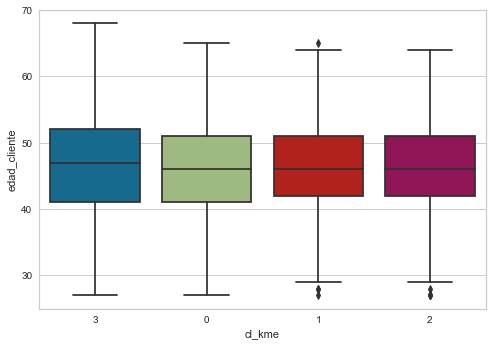

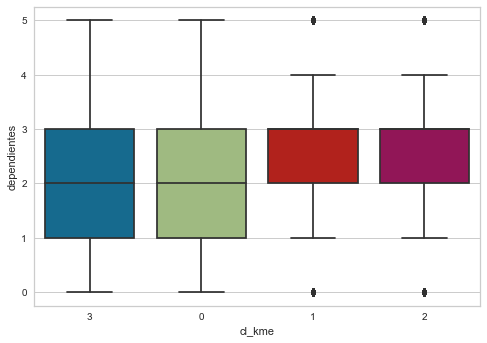

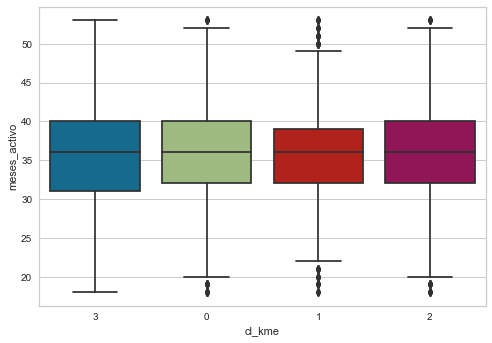

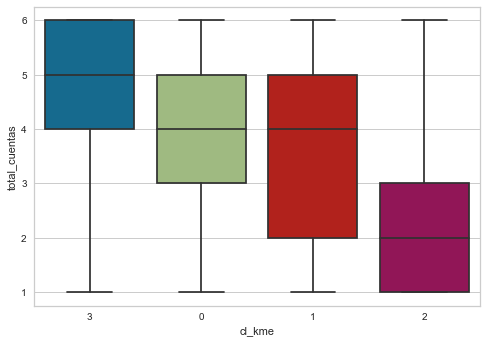

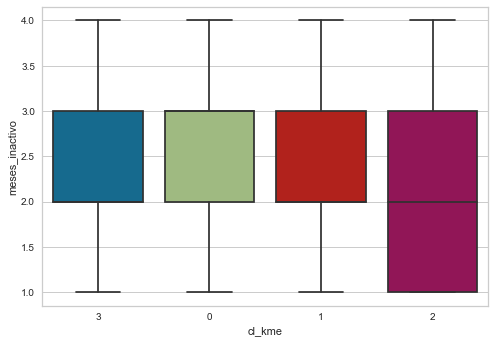

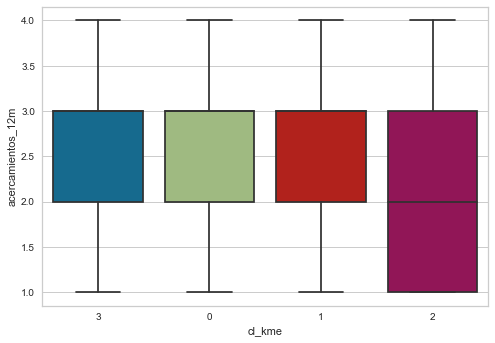

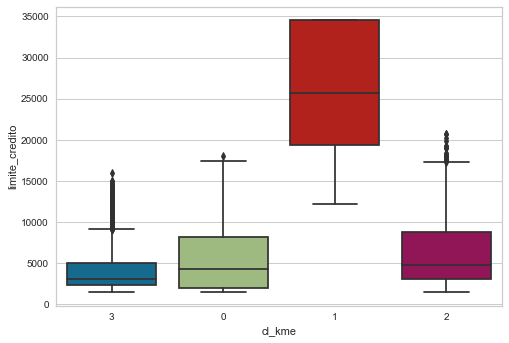

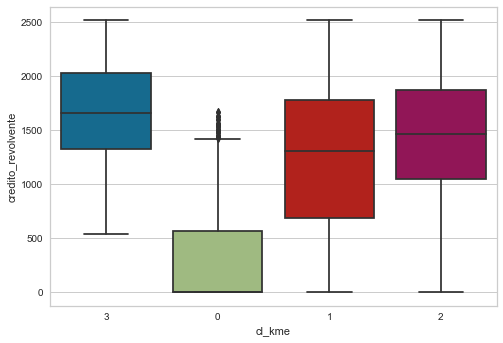

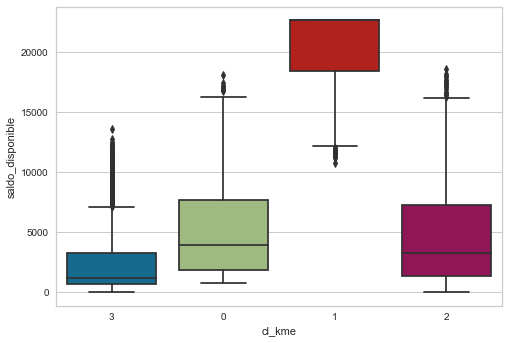

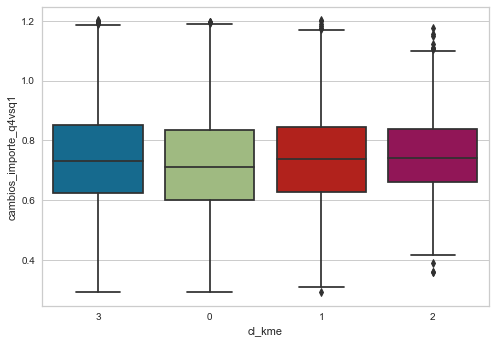

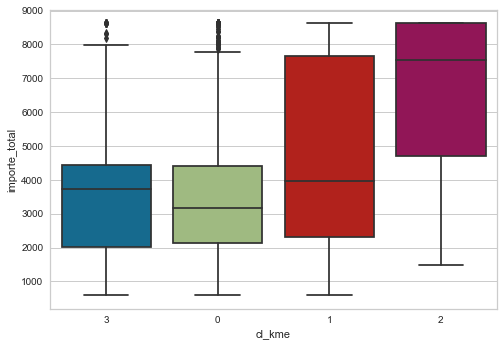

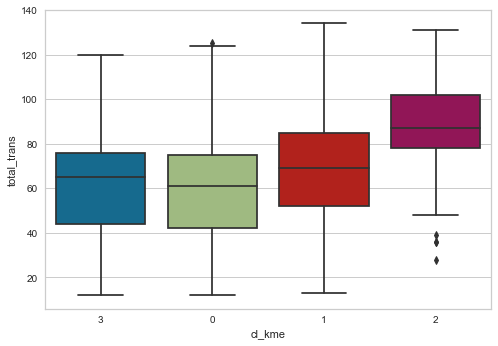

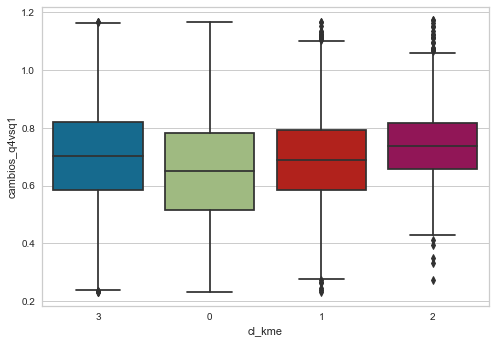

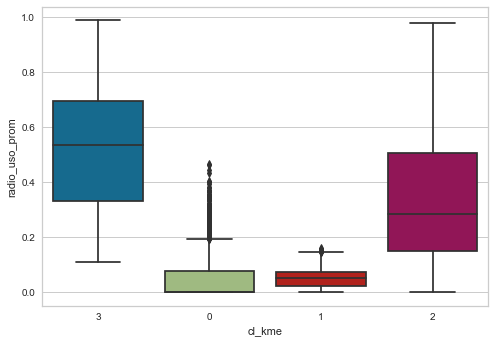

In [42]:
for v in numericas:
    print(v)
    display(MultiComparison(df[v],df['cl_kme']).tukeyhsd().summary())
    plt.figure()
    sns.boxplot(data=df,y=v,x='cl_kme')

In [43]:
df1=df.drop(columns={"id_clientum"})
display(df1.groupby('cl_kme').mean().style.background_gradient(axis=0))
display(df1.mean().to_frame().T)

,tgt,edad_cliente,dependientes,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom
cl_kme,,,,,,,,,,,,,,,
0,0.343328,46.252956,2.370777,35.860220,3.954392,2.408784,2.679899,5466.965076,253.778716,5213.186360,0.720069,3305.818623,58.653716,0.650279,0.044218
1,0.139442,46.332005,2.588977,35.924967,3.677291,2.235724,2.549801,26097.404382,1207.852590,20437.472112,0.738471,4591.927789,69.674635,0.689944,0.050645
2,0.052448,46.111888,2.504196,35.762937,1.999301,2.097902,1.980420,6209.237413,1427.662937,4781.574476,0.751198,6652.180769,90.441259,0.740294,0.329527
3,0.098619,46.551237,2.336653,36.036942,4.480887,2.247671,2.606489,4077.054385,1684.186637,2392.867748,0.738526,3332.687119,61.018632,0.701877,0.520392


,tgt,edad_cliente,dependientes,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom,cl_agg,cl_kme,cl_gmm
0,0.166924,46.353451,2.419865,35.920637,3.767376,2.265415,2.510633,8770.291565,1152.952952,6820.756457,0.735476,4114.398865,66.900796,0.691752,0.269952,inf,inf,inf


In [44]:
columnas=["v_gender","v_education_level","v_marital_status",
          "v_income_category","v_card_category"]
df1=pd.get_dummies(df1,columns =columnas,prefix_sep='_',
                  drop_first=True)

In [45]:
display(df1.groupby('cl_kme').mean().style.background_gradient(axis=0))
display(df1.mean().to_frame().T)

,tgt,edad_cliente,dependientes,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom,v_gender_m,v_education_level_doctorate,v_education_level_graduate,v_education_level_high school,v_education_level_post graduate,v_education_level_uneducated,v_education_level_unknown,v_marital_status_married,v_marital_status_single,v_marital_status_unknown,v_income_category_40k 60k,v_income_category_60k 80k,v_income_category_80k 120k,v_income_category_less than 40k,v_income_category_unknown,v_card_category_gold,v_card_category_silver
cl_kme,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.343328,46.252956,2.370777,35.860220,3.954392,2.408784,2.679899,5466.965076,253.778716,5213.186360,0.720069,3305.818623,58.653716,0.650279,0.044218,0.405405,0.053632,0.310811,0.194257,0.051520,0.139780,0.152872,0.450169,0.404139,0.075591,0.198902,0.138091,0.113176,0.384291,0.125422,0.001689,0.017736
1,0.139442,46.332005,2.588977,35.924967,3.677291,2.235724,2.549801,26097.404382,1207.852590,20437.472112,0.738471,4591.927789,69.674635,0.689944,0.050645,0.848606,0.040505,0.309429,0.195219,0.058433,0.150066,0.146082,0.399734,0.427623,0.085657,0.054449,0.200531,0.375830,0.009960,0.121514,0.068393,0.237052
2,0.052448,46.111888,2.504196,35.762937,1.999301,2.097902,1.980420,6209.237413,1427.662937,4781.574476,0.751198,6652.180769,90.441259,0.740294,0.329527,0.397203,0.046853,0.300699,0.204196,0.047552,0.141958,0.155944,0.445455,0.392308,0.083217,0.223077,0.119580,0.106993,0.416084,0.096503,0.009091,0.046853
3,0.098619,46.551237,2.336653,36.036942,4.480887,2.247671,2.606489,4077.054385,1684.186637,2392.867748,0.738526,3332.687119,61.018632,0.701877,0.520392,0.358175,0.041118,0.311597,0.202056,0.050112,0.153228,0.143913,0.486669,0.370704,0.069708,0.200771,0.113717,0.099582,0.454224,0.093479,0.000000,0.005782


,tgt,edad_cliente,dependientes,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom,cl_agg,cl_kme,cl_gmm,v_gender_m,v_education_level_doctorate,v_education_level_graduate,v_education_level_high school,v_education_level_post graduate,v_education_level_uneducated,v_education_level_unknown,v_marital_status_married,v_marital_status_single,v_marital_status_unknown,v_income_category_40k 60k,v_income_category_60k 80k,v_income_category_80k 120k,v_income_category_less than 40k,v_income_category_unknown,v_card_category_gold,v_card_category_silver
0,0.166924,46.353451,2.419865,35.920637,3.767376,2.265415,2.510633,8770.291565,1152.952952,6820.756457,0.735476,4114.398865,66.900796,0.691752,0.269952,inf,inf,inf,0.465843,0.045503,0.309136,0.199002,0.051562,0.146964,0.148865,0.453843,0.393965,0.076512,0.177854,0.137103,0.154093,0.34858,0.107996,0.014257,0.057503


## Gráfico Radial

In [46]:
df.loc[df.cl_kme=='0'].sample(10)

,id_clientum,tgt,edad_cliente,v_gender,dependientes,v_education_level,v_marital_status,v_income_category,v_card_category,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom,cl_agg,cl_kme,cl_gmm
5849,713531808,0,38,f,1,doctorate,married,less than 40k,blue,28,6,1,1,1438.3,0,1438.3,0.813,4475.0,74,0.644,0.000,2,0,2
5361,720835308,0,49,f,2,uneducated,married,unknown,blue,34,6,1,3,3017.0,0,3017.0,0.702,4389.0,72,0.636,0.000,2,0,2
7505,755212608,1,50,m,2,unknown,married,40k 60k,blue,43,4,3,3,13067.0,0,13067.0,1.061,5468.0,71,0.775,0.000,2,0,2
3561,713452533,0,35,f,4,graduate,single,less than 40k,blue,22,6,3,3,1438.3,0,1438.3,0.512,3427.0,64,0.829,0.000,2,0,2
6817,719922558,0,45,f,5,unknown,divorced,40k 60k,blue,33,2,2,3,1438.3,0,1438.3,0.739,5346.0,84,0.787,0.000,0,0,2
3002,807014583,0,31,f,0,graduate,divorced,unknown,blue,26,3,3,3,1469.0,0,1469.0,0.915,4331.0,89,0.935,0.000,2,0,2
578,717190533,0,49,m,4,high school,married,60k 80k,blue,36,6,3,2,12938.0,661,12277.0,0.725,1282.0,32,0.778,0.051,0,0,2
6158,779839758,0,47,f,2,post graduate,single,unknown,blue,31,3,2,3,1491.0,0,1491.0,0.716,4634.0,92,0.804,0.000,2,0,2
209,710940183,1,49,f,3,graduate,married,less than 40k,blue,38,6,3,2,2185.0,0,2185.0,0.727,715.0,20,0.818,0.000,2,0,2
1987,714392808,0,51,m,3,unknown,married,80k 120k,blue,43,3,4,4,13933.0,1019,12914.0,0.875,3504.0,62,0.771,0.073,0,0,2


In [47]:
Xs['cl_kme'] = df['cl_kme']

In [48]:
aux = Xs[numericas+['cl_kme']].groupby('cl_kme').mean()
aux

,edad_cliente,dependientes,meses_activo,total_cuentas,meses_inactivo,acercamientos_12m,limite_credito,credito_revolvente,saldo_disponible,cambios_importe_q4vsq1,importe_total,total_trans,cambios_q4vsq1,radio_uso_prom
cl_kme,,,,,,,,,,,,,,
0,0.469584,0.474155,0.510292,0.590878,0.469595,0.559966,0.121794,0.100826,0.229237,0.470340,0.337911,0.382408,0.446041,0.044755
1,0.471512,0.517795,0.512142,0.535458,0.411908,0.516600,0.745490,0.479878,0.901785,0.490607,0.498169,0.472743,0.488238,0.051261
2,0.466144,0.500839,0.507512,0.199860,0.365967,0.326807,0.144234,0.567208,0.210170,0.504623,0.754890,0.642961,0.541803,0.333530
3,0.476859,0.467331,0.515341,0.696177,0.415890,0.535496,0.079774,0.669125,0.104647,0.490667,0.341259,0.401792,0.500933,0.526712


In [49]:
fig = go.Figure()

for i,row in aux.iterrows():
    fig.add_trace(go.Scatterpolar(r=row.values,
                                  theta=numericas,
                                  fill='toself',
                                  name=f'cluster {i}'))
fig.show()

**Caracerísticas que más definen a los clusters**